Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 18.8 MB/s eta 0:00:00
Starting simulation at t=0. s for a duration of 50. ms
50. ms (100%) simulated in < 1s
Starting simulation at t=53. ms for a duration of 100. ms
100. ms (100%) simulated in < 1s


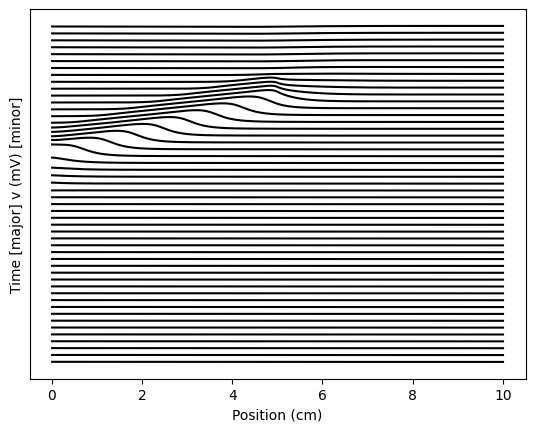

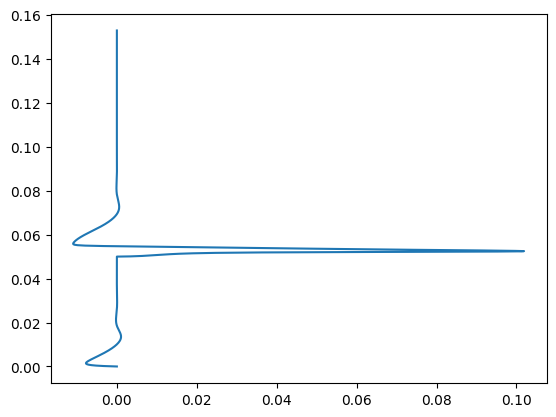

In [3]:
!pip install brian2
from brian2 import *
start_scope()
morpho = Cylinder(length=10*cm, diameter=2*238*um, n=1000, type='axon')

El = 10.613*mV
ENa = 115*mV
EK = -12*mV
gl = 0.3*msiemens/cm**2
gNa0 = 120*msiemens/cm**2
gK = 36*msiemens/cm**2

# Typical equations
eqs = '''
# The same equations for the whole neuron, but possibly different parameter values
# distributed transmembrane current
Im = gl * (El-v) + gNa * m**3 * h * (ENa-v) + gK * n**4 * (EK-v) : amp/meter**2
I : amp (point current) # applied current
dm/dt = alpham * (1-m) - betam * m : 1
dn/dt = alphan * (1-n) - betan * n : 1
dh/dt = alphah * (1-h) - betah * h : 1
alpham = (0.1/mV) * 10*mV/exprel((-v+25*mV)/(10*mV))/ms : Hz
betam = 4 * exp(-v/(18*mV))/ms : Hz
alphah = 0.07 * exp(-v/(20*mV))/ms : Hz
betah = 1/(exp((-v+30*mV) / (10*mV)) + 1)/ms : Hz
alphan = (0.01/mV) * 10*mV/exprel((-v+10*mV)/(10*mV))/ms : Hz
betan = 0.125*exp(-v/(80*mV))/ms : Hz
gNa : siemens/meter**2
'''

neuron = SpatialNeuron(morphology=morpho, model=eqs, Cm=1*uF/cm**2,
                       Ri=35.4*ohm*cm, method="exponential_euler")
neuron.v = 0*mV
neuron.h = 1
neuron.m = 0
neuron.n = .5
neuron.I = 0
neuron.gNa = gNa0
neuron[5*cm:10*cm].gNa = 0*siemens/cm**2
M = StateMonitor(neuron, 'v', record=True)

run(50*ms, report='text')
neuron.I[0] = 1*uA  # current injection at one end
run(3*ms)
neuron.I = 0*amp
run(100*ms, report='text')
for i in range(75, 125, 1):
    plot(cumsum(neuron.length)/cm, i+(1./60)*M.v[:, i*5]/mV, 'k')
yticks([])
ylabel('Time [major] v (mV) [minor]')
xlabel('Position (cm)')
axis('tight')
show()
plot(M.v[0],M.t)

WARNING    <ipython-input-4-14ee95f20283>:6: RuntimeWarning: invalid value encountered in double_scalars
  alphan = (0.01)*(i+10)/(exp((i+10)/10)-1)
 [py.warnings]
  alphan = (0.01)*(i+10)/(exp((i+10)/10)-1)



Text(0, 0.5, 'n-infinity')

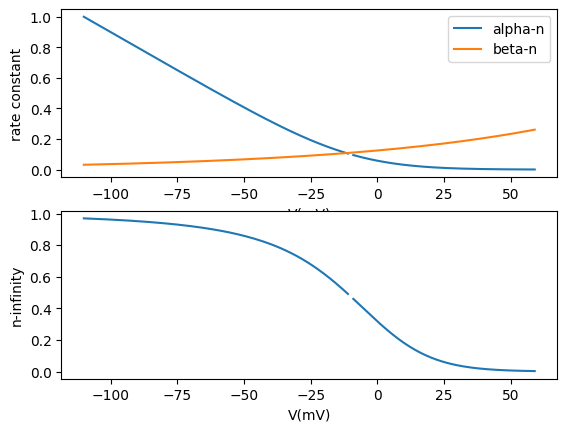

In [4]:
v=range(-110,60)
list1=[]
list2=[]
list3=[]
for i in range(-110,60):
    alphan = (0.01)*(i+10)/(exp((i+10)/10)-1)
    betan=0.125*exp(i/80)
    ni=alphan/(alphan+betan)
    list1.append(alphan)
    list2.append(betan)
    list3.append(ni)
subplot(211)    
plt.plot(v,list1,label="alpha-n")
plt.plot(v,list2,label="beta-n")
plt.legend()
xlabel('V(mV)')
ylabel('rate constant')
subplot(212)
plot(v,list3)
xlabel('V(mV)')
ylabel('n-infinity')

(0.0, 5.0)

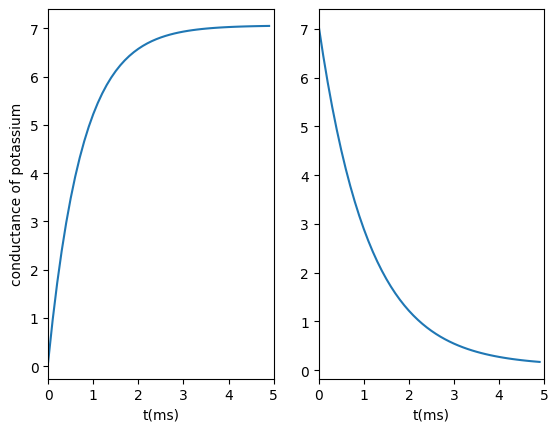

In [5]:
import numpy as np
gki=7.06
gk0=0.09
tau=0.75
t=np.arange(0.0,5.0,0.1)
list=[]
for i in t:
    gk=pow((gki-(gki-gk0)*exp(-i/tau)),1)
    list.append(gk)
subplot(121)    
plot(t,list)
xlabel('t(ms)')
xlim([0,5])
ylabel('conductance of potassium')
import numpy as np
gki=0.09
gk0=7.06
tau=1.1
t=np.arange(0.0,5.0,0.1)
list=[]
for i in t:
    gk=pow((gki-(gki-gk0)*exp(-i/tau)),1)
    list.append(gk)
subplot(122)    
plot(t,list)
xlabel('t(ms)')
xlim([0,5])

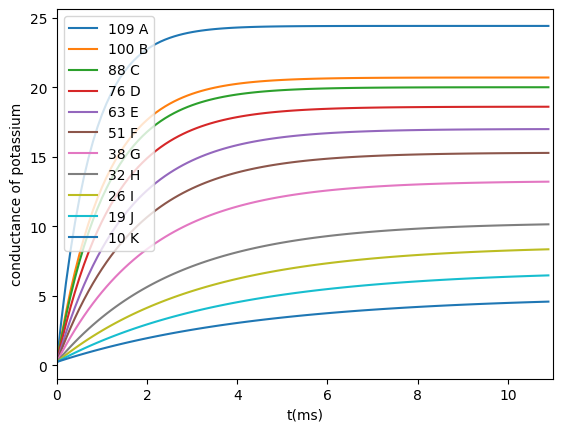

In [6]:
import numpy as np
import matplotlib.pyplot as plt
gki=24.41
gk0=0.24
tau=0.75
t=np.arange(0.0,11.0,0.1)
list=[]
for i in t:
    gk=pow((gki-(gki-gk0)*exp(-i/tau)),1)
    list.append(gk)
plt.plot(t,list,label="109 A")

gki=20.70
gk0=0.24
tau=1.05
t=np.arange(0.0,11.0,0.1)
list=[]
for i in t:
    gk=pow((gki-(gki-gk0)*exp(-i/tau)),1)
    list.append(gk)    
plt.plot(t,list,label="100 B")

gki=20.00
gk0=0.24
tau=1.1
t=np.arange(0.0,11.0,0.1)
list=[]
for i in t:
    gk=pow((gki-(gki-gk0)*exp(-i/tau)),1)
    list.append(gk)    
plt.plot(t,list,label="88 C")

gki=18.6
gk0=0.24
tau=1.25
t=np.arange(0.0,11.0,0.1)
list=[]
for i in t:
    gk=pow((gki-(gki-gk0)*exp(-i/tau)),1)
    list.append(gk)    
plt.plot(t,list,label="76 D")

gki=17.00
gk0=0.24
tau=1.50
t=np.arange(0.0,11.0,0.1)
list=[]
for i in t:
    gk=pow((gki-(gki-gk0)*exp(-i/tau)),1)
    list.append(gk)    
plt.plot(t,list,label="63 E")

gki=15.30
gk0=0.24
tau=1.70
t=np.arange(0.0,11.0,0.1)
list=[]
for i in t:
    gk=pow((gki-(gki-gk0)*exp(-i/tau)),1)
    list.append(gk)    
plt.plot(t,list,label="51 F")

gki=13.27
gk0=0.24
tau=2.05
t=np.arange(0.0,11.0,0.1)
list=[]
for i in t:
    gk=pow((gki-(gki-gk0)*exp(-i/tau)),1)
    list.append(gk)    
plt.plot(t,list,label="38 G")

gki=10.29
gk0=0.24
tau=2.6
t=np.arange(0.0,11.0,0.1)
list=[]
for i in t:
    gk=pow((gki-(gki-gk0)*exp(-i/tau)),1)
    list.append(gk)    
plt.plot(t,list,label="32 H")

gki=8.62
gk0=0.24
tau=3.2
t=np.arange(0.0,11.0,0.1)
list=[]
for i in t:
    gk=pow((gki-(gki-gk0)*exp(-i/tau)),1)
    list.append(gk)    
plt.plot(t,list,label="26 I")

gki=6.84
gk0=0.24
tau=3.8
t=np.arange(0.0,11.0,0.1)
list=[]
for i in t:
    gk=pow((gki-(gki-gk0)*exp(-i/tau)),1)
    list.append(gk)    
plt.plot(t,list,label="19 J")

gki=5.0
gk0=0.24
tau=4.5
t=np.arange(0.0,11.0,0.1)
list=[]
for i in t:
    gk=pow((gki-(gki-gk0)*exp(-i/tau)),1)
    list.append(gk)    
plt.plot(t,list,label="10 K")
xlabel('t(ms)')
xlim([0,11])
ylabel('conductance of potassium')
plt.legend()

Text(0, 0.5, 'h-infinity')

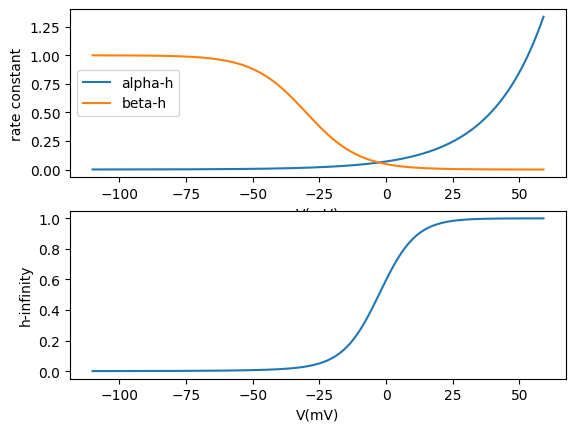

In [7]:
v=range(-110,60)
import matplotlib.pyplot as plt
list1=[]
list2=[]
list3=[]
for i in range(-110,60):
    alphah = 0.07*exp(i/20)
    betah=1/(exp((i+30)/10)+1)
    hi=alphah/(alphah+betah)
    list1.append(alphah)
    list2.append(betah)
    list3.append(hi)
subplot(211)    
plt.plot(v,list1,label="alpha-h")
plt.plot(v,list2,label="beta-h")
plt.legend()
xlabel('V(mV)')
ylabel('rate constant')
subplot(212)
plot(v,list3)
xlabel('V(mV)')
ylabel('h-infinity')
